In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
%matplotlib inline

import tensorflow as tf

In [2]:
import os #operating system
import shutil

In [3]:
base_dir = "/Users/bagdeoggeun/Downloads"
img_dir = "/Users/bagdeoggeun/Downloads/train"

#이미지 위치 알잘딱 변경 바람

In [4]:
batch_size = 42
img_height = 224
img_width = 224


In [16]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    img_dir,
    image_size=(img_height,img_width),
    batch_size=batch_size,
    subset='training',
    validation_split=0.2,
    seed = 123
    )


Found 33593 files belonging to 42 classes.
Using 26875 files for training.


In [17]:
val_ds = keras.preprocessing.image_dataset_from_directory(
    img_dir,
    image_size=(img_height,img_width),
    batch_size=batch_size,
    subset='training',
    validation_split=0.2,
    seed = 123
    )

Found 33593 files belonging to 42 classes.
Using 26875 files for training.


In [6]:
print(train_ds.class_names)

['갈비구이', '갈치구이', '감자전', '경단', '계란국', '계란말이', '계란후라이', '고등어구이', '곱창구이', '김밥', '김치볶음밥', '김치전', '꿀떡', '누룽지', '닭갈비', '더덕구이', '동그랑땡', '떡갈비', '떡국_만두국', '무국', '미역국', '북엇국', '불고기', '비빔밥', '삼겹살', '새우볶음밥', '생선전', '송편', '시래기국', '알밥', '유부초밥', '육개장', '잡곡밥', '장어구이', '조개구이', '조기구이', '주먹밥', '콩나물국', '파전', '호박전', '황태구이', '훈제오리']


In [7]:
from matplotlib import rc
rc('font' , family='AppleGothic')

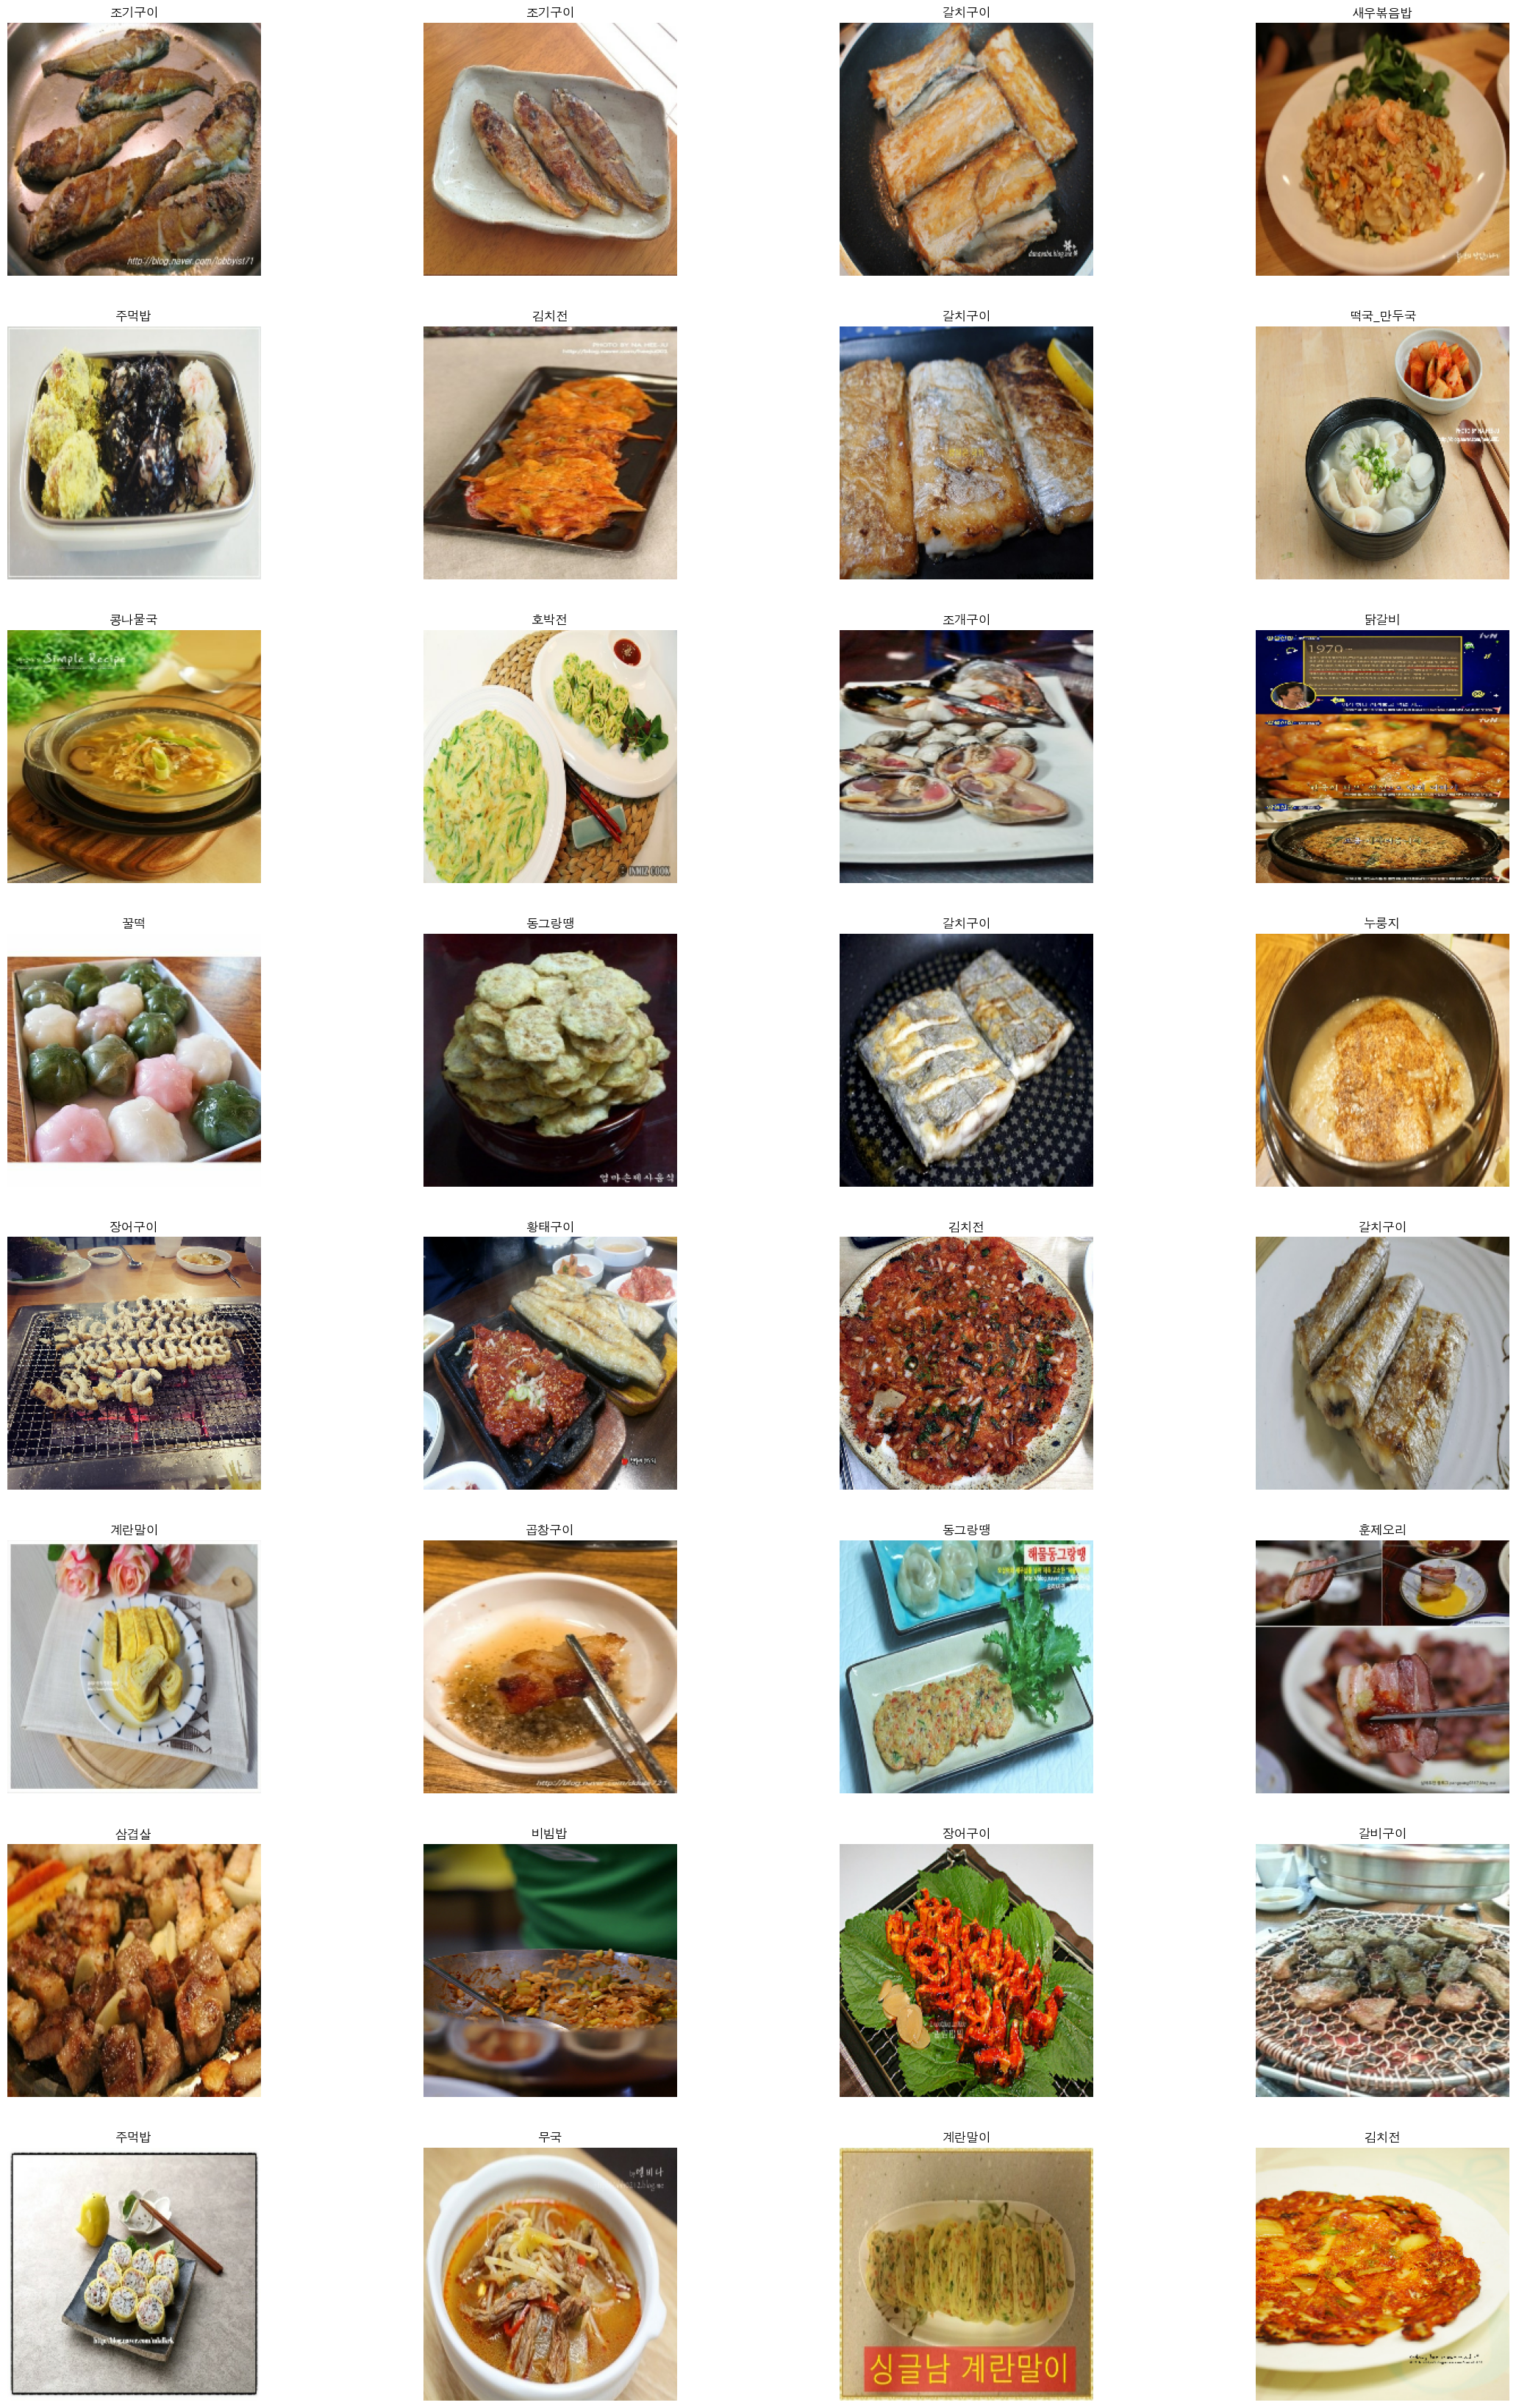

In [8]:
plt.figure(figsize=(28,42))
for images, labels in train_ds.take(1):
    for i in range(32):
        
        ax = plt.subplot(8,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

In [11]:
class_names = train_ds.class_names

In [9]:
print(train_ds.take(1))

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [22]:
# 간단하게 분류 테스
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.layers.MaxPooling2D(),
  tf.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.layers.MaxPooling2D(),
  tf.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.layers.MaxPooling2D(),
  tf.layers.Flatten(),
  tf.layers.Dense(128, activation='relu'),
  tf.layers.Dense(num_classes)
])

AttributeError: module 'tensorflow' has no attribute 'layers'